Types of Numerical Instability Generally 2 kinds of numerical stability: In context of linear algebra, instabilities caused by proximity to singularities of various kinds In context of solving differential equations, the concern is growth of round-off errors and/or initially small fluctuations This document discusses the first (a) kind

In [1]:
import numpy as np
x = np.float64(0.1)
y = np.float32(0.1)
print 'Relative error: ', abs(x - y)
print 'Absolute error: ', abs(x - y) / abs(x)

Relative error:  1.49011611383e-09
Absolute error:  1.49011611383e-08


Cancellation examples:

In [3]:
from math import sin, cos

near_zero = 1.2e-8

def f(x):
    return (1 - cos(x)) / x**2
print f(near_zero)

# Rewrite f(x) as g(x) (meaning f(x) == g(x)):
def g(x):
    return 0.5 * (2 * sin(x / 2) / x)**2

print g(near_zero)

# for i in range(1, 101):
#     val = i * 0.1
#     print f(val) - g(val)

0.770988211545
0.5


Summing numbers: https://docs.python.org/2/library/math.html https://en.m.wikipedia.org/wiki/Kahan_summation_algorithm
Interestingly, IPython Notebook appears to do the right thing by default, what?
IPython session:

In [6]: from math import fsum

In [7]: sum([0.1] * 10) Out[7]: 0.9999999999999999

In [8]: fsum([0.1] * 10) Out[8]: 1.0

In [5]:
from math import fsum
print sum([0.1] * 10)
print fsum([0.1] * 10)

1.0
1.0


Calculations without subtractions are fine, right?

In [8]:
def f(n):
    return (1 + 1.0 / n)**n

from math import exp
e = exp(1)

for i in range(10, 20):
    print f(10**i) - e

2.24775742463e-07
2.2489806506e-07
0.000241667578193
-0.00217179437214
-0.00217179437202
0.31675337809
-1.71828182846
-1.71828182846
-1.71828182846
-1.71828182846


In [10]:
from math import sqrt
def identity(x, n):
    for i in xrange(n):
        x = sqrt(x)
    for i in xrange(n):
        x = x**2
    return x

x = 2
for i in xrange(35, 60):
    print x - identity(x, i)

2.86924558557e-06
2.86924558557e-06
2.86924558557e-06
6.39033563783e-05
6.39033563783e-05
6.39033563783e-05
0.000552109267035
0.00152816348552
0.00347884372214
0.00347884372214
0.0112625424503
0.0112625424503
0.0112625424503
0.0112625424503
0.131754051284
0.351278735449
0.351278735449
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [1]:
from math import fsum, pi

def basel1(n):
    r = 0
    for i in xrange(n):
        r += 1.0 / (i + 1)**2
    return r

def basel2(n):
    r = 0
    for i in reversed(xrange(n)):
        r += 1.0 / (i + 1)**2
    return r

def basel3(n):
    return sum(1.0 / (i + 1)**2 for i in xrange(n))

def basel4(n):
    return fsum(1.0 / (i + 1)**2 for i in xrange(n))
        
x = pi**2 / 6
n = 1000000

print x - basel1(n)
print x - basel2(n)
print x - basel3(n)
print x - basel4(n)

9.99999456353e-07
9.99999500095e-07
9.99999456353e-07
9.99999499873e-07


Sometimes the rounding errors cancel out and produce a result more accurate than the intermediate calculations.

In [27]:
# Computing f(x) = (exp(x) - 1) / x == sum(x^i / (i + 1)!)

from math import exp, log

def f1(x):
    if 0 == x:
        return 1
    return (exp(x) - 1) / x

def f2(x):
    if 0 == x:
        return 1
    y = exp(x)
    return (y - 1) / log(y)

# f(epsilon) ~= 1
for i in range(8, 15):
    print abs(1 - f1(1.0 / (10**i))), abs(1 - f2(1.0 / (10**i)))
    
# NOTE: Above doesn't hold if we calculate for powers of 2!
# for i in range(30, 40):
#     print abs(1 - f1(1.0 / (2**i))), abs(1 - f2(1.0 / (2**i)))

6.07747097092e-09 4.99999996961e-09
8.27403709991e-08 5.0000004137e-10
8.27403709991e-08 5.0000004137e-11
8.27403709991e-08 5.0000004137e-12
8.8900582341e-05 5.00044450291e-13
0.000799277837359 4.99600361081e-14
0.000799277837359 5.10702591328e-15


Rounding errors are not random.

-4.4408920985e-16
[ 8.75237658  8.75237658  8.75237658  8.75237658  8.75237658  8.75237658
  8.75237658  8.75237658  8.75237658  8.75237658  8.75237658  8.75237658
  8.75237658  8.75237658  8.75237658  8.75237658  8.75237658  8.75237658
  8.75237658  8.75237658  8.75237658  8.75237658  8.75237658  8.75237658
  8.75237658  8.75237658  8.75237658  8.75237658  8.75237658  8.75237658
  8.75237658  8.75237658  8.75237658  8.75237658  8.75237658  8.75237658
  8.75237658  8.75237658  8.75237658  8.75237658  8.75237658  8.75237658
  8.75237658  8.75237658  8.75237658  8.75237658  8.75237658  8.75237658
  8.75237658  8.75237658  8.75237658  8.75237658  8.75237658  8.75237658
  8.75237658  8.75237658  8.75237658  8.75237658  8.75237658  8.75237658
  8.75237658  8.75237658  8.75237658  8.75237658  8.75237658  8.75237658
  8.75237658  8.75237658  8.75237658  8.75237658  8.75237658  8.75237658
  8.75237658  8.75237658  8.75237658  8.75237658  8.75237658  8.75237658
  8.75237658  8.75237658  8.75237

AttributeError: 'list' object has no attribute 'set_ylim'

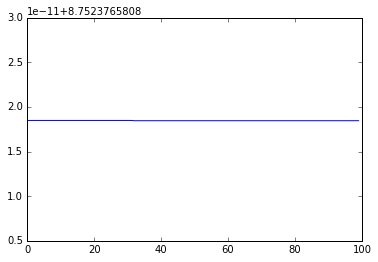

In [77]:
import numpy as np

def r(x):
    p = 622.0 - x * (751.0 - x * (324.0 - x * (59.0 - 4 * x)))
    q = 112 - x * (151 - x * (72 - x * (14 - x)))
    return p / q

a = 1.606
t = np.array([a + k * 2**-58 for k in xrange(100)])

print t[0] - t[-1]

t = r(t)
print t

import matplotlib.pyplot as plt
%matplotlib inline
axes = plt.plot(t)

# axes.set_xlim([xmin,xmax])
axes.set_ylim([t.min(), t.max()])

In [ ]:
Page 26 (55)